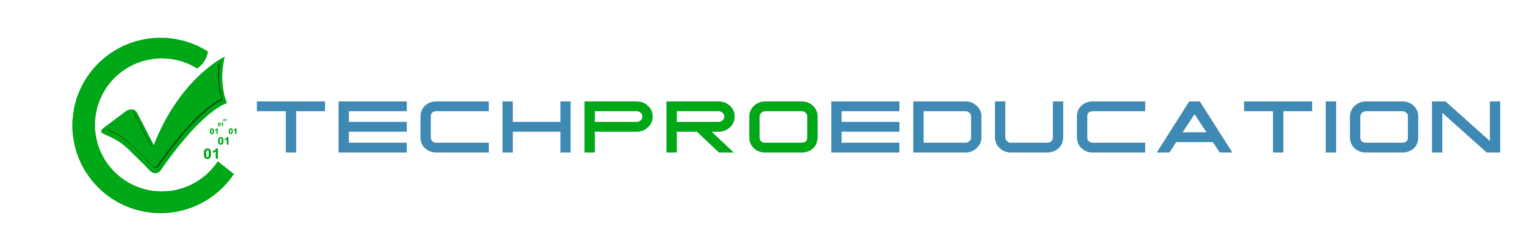

# Hand Written Digits Project

Data reference link : https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

The data is about the recognition of handwritten numbers from 0 to 9. There are 30 writers in the training dataset and each participant are asked to write 250 digits in random order. Without missing data, this dataset has 10992 observations. The researcher considers spatial resampling. Thus, for each digit, eight pairs of 2 dimensional (x axis and y axis) locations are recorded, which makes this dataset have 16 dimensional predictor variables.

# Exploratory Data Analysis and Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

C:\Users\firat\anaconda3\envs\py3.10.8\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [2]:
df = pd.read_csv("pendigits_txt.csv")
df.head()

input1  input2  input3  input4  input5  input6  input7  input8  input9  \
0      47     100      27      81      57      37      26       0       0   
1       0      89      27     100      42      75      29      45      15   
2       0      57      31      68      72      90     100     100      76   
3       0     100       7      92       5      68      19      45      86   
4       0      67      49      83     100     100      81      80      60   

   input10  input11  input12  input13  input14  input15  input16  class  
0       23       56       53      100       90       40       98      8  
1       15       37        0       69        2      100        6      2  
2       75       50       51       28       25       16        0      1  
3       34      100       45       74       23       67        0      4  
4       60       40       40       33       20       47        0      1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [4]:
df.describe().T

count       mean        std  min   25%   50%    75%    max
input1   10992.0  38.814320  34.257783  0.0   6.0  32.0   65.0  100.0
input2   10992.0  85.120269  16.218571  0.0  76.0  89.0  100.0  100.0
input3   10992.0  40.605622  26.342984  0.0  20.0  40.0   58.0  100.0
input4   10992.0  83.774199  19.163646  0.0  72.0  91.0  100.0  100.0
input5   10992.0  49.770378  34.100515  0.0  18.0  53.0   78.0  100.0
input6   10992.0  65.573144  26.996688  0.0  49.0  71.0   86.0  100.0
input7   10992.0  51.220251  30.576881  0.0  28.0  53.5   74.0  100.0
input8   10992.0  44.498999  29.906104  0.0  23.0  43.0   64.0  100.0
input9   10992.0  56.868541  34.135530  0.0  29.0  60.0   89.0  100.0
input10  10992.0  33.695961  27.251548  0.0   7.0  33.0   54.0  100.0
input11  10992.0  60.516376  37.288086  0.0  23.0  73.0   97.0  100.0
input12  10992.0  34.826510  27.119982  0.0  11.0  30.0   55.0  100.0
input13  10992.0  55.022289  22.335539  0.0  42.0  53.0   68.0  100.0
input14  10992.0  34.937045  33.155463  0.0   5.0  27.0   47.0  100.0
input15  10992.0  47.287482  41.760400  0.0   0.0  40.0  100.0  100.0
input16  10992.0  28.845342  35.778094  0.0   0.0   9.0   51.0  100.0
class    10992.0   4.431587   2.876947  0.0   2.0   4.0    7.0    9.0

In [5]:
df.shape

(10992, 17)

In [6]:
df.duplicated().sum() 

0

In [7]:
df["class"].value_counts().sort_index()  

0    1143
1    1143
2    1144
3    1055
4    1144
5    1055
6    1056
7    1142
8    1055
9    1055
Name: class, dtype: int64

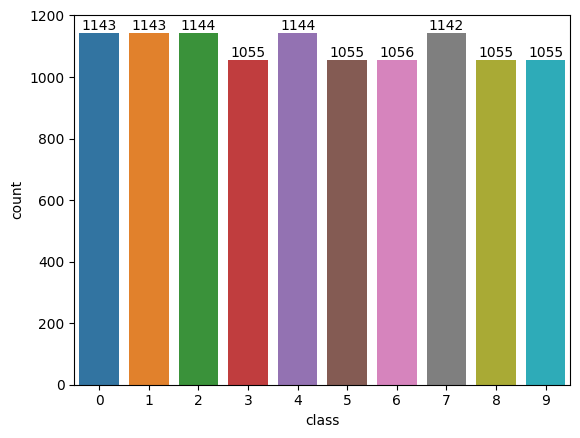

In [8]:
ax= sns.countplot(df["class"])
ax.bar_label(ax.containers[0]); 

# balanced bir data

In [9]:
df.iloc[:,:-1].iplot(kind="box")

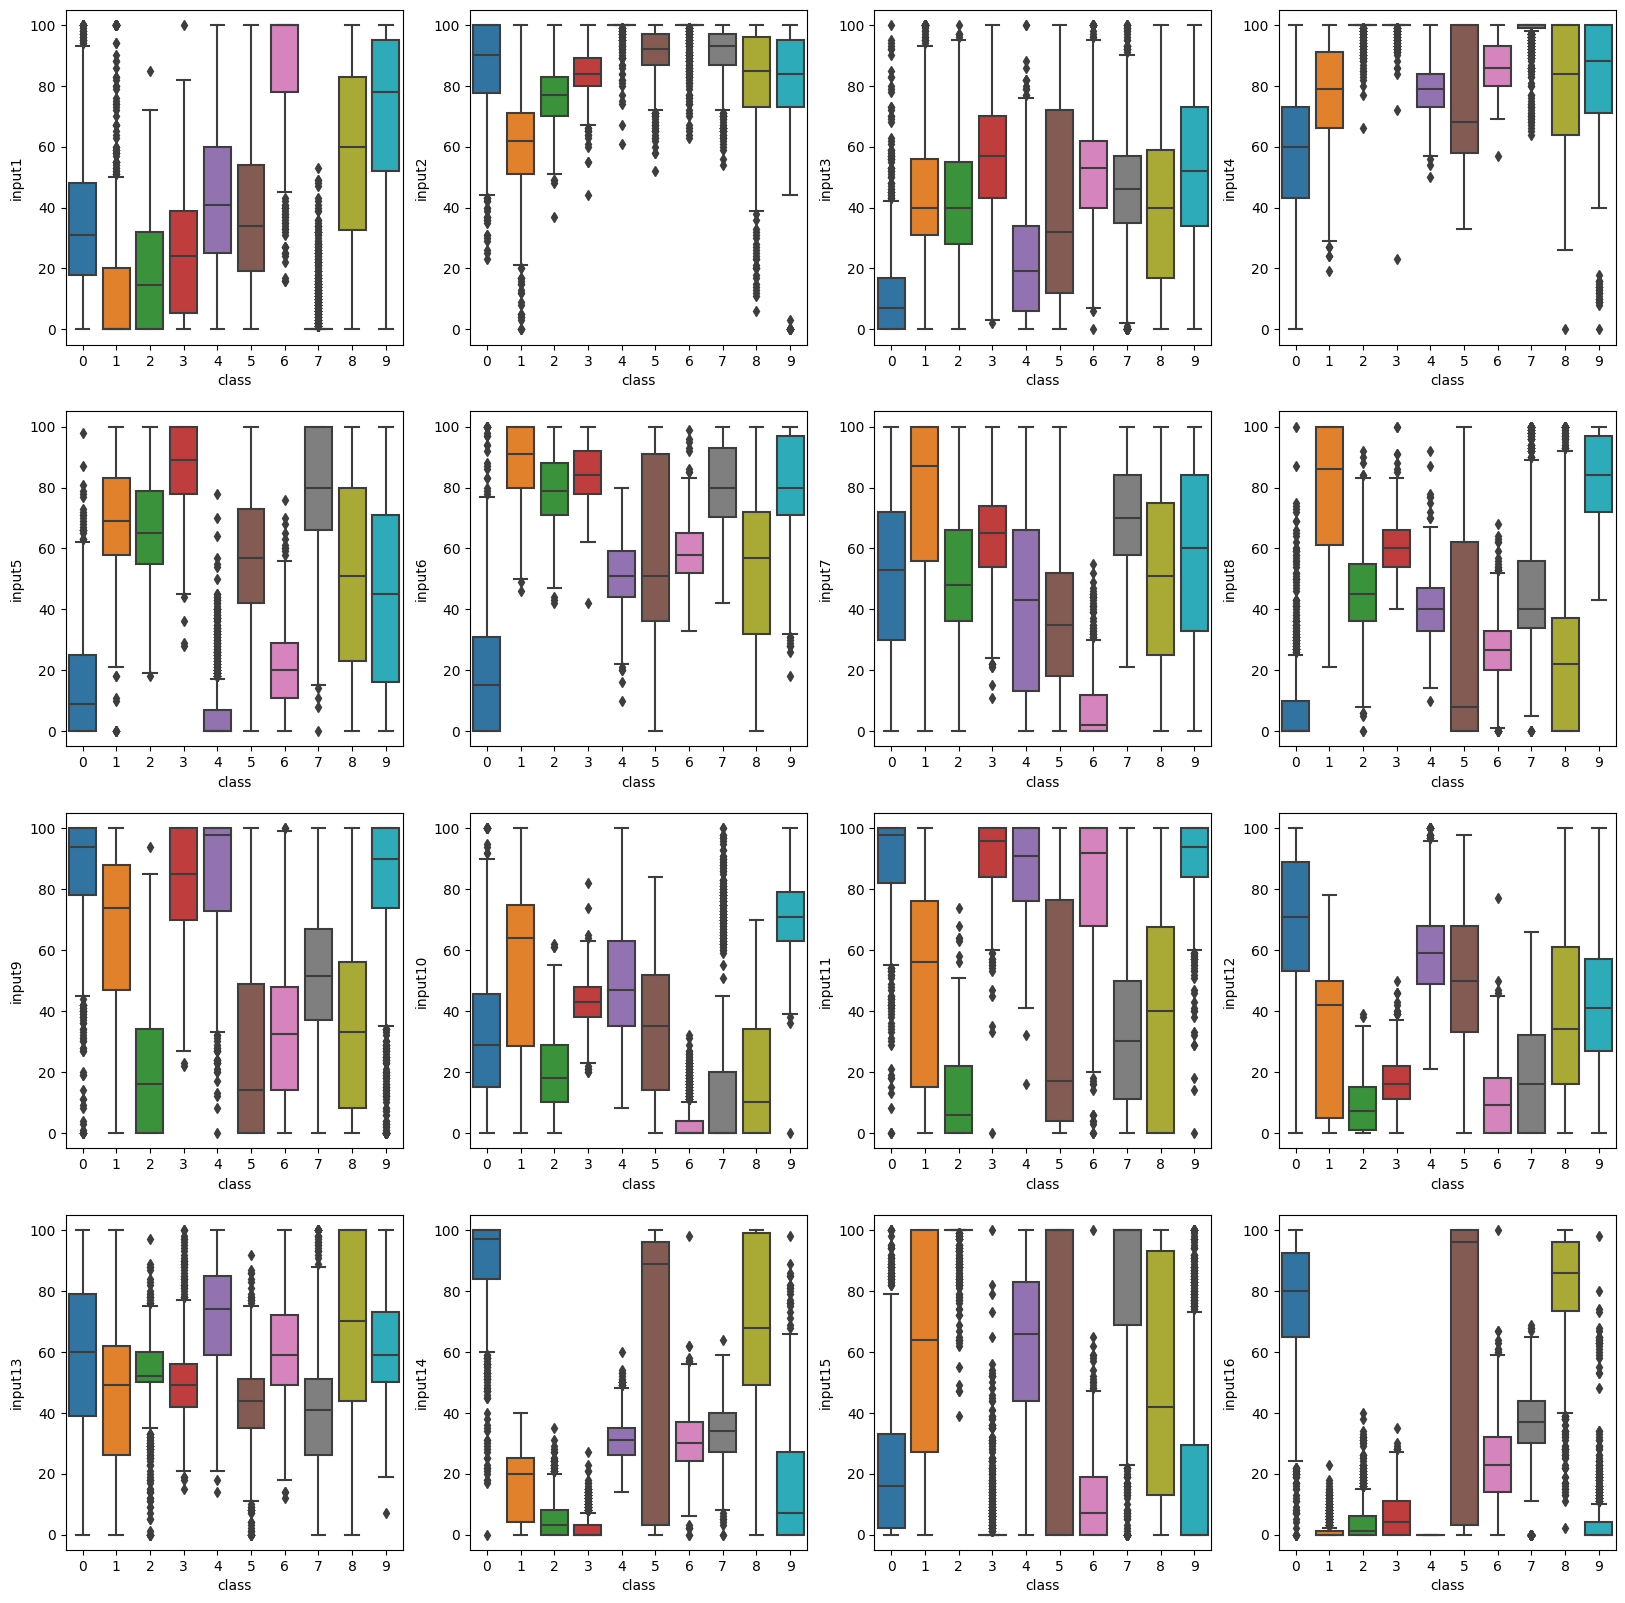

In [10]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "class":
        index += 1
        plt.subplot(4,4,index)
        sns.boxplot(x='class',y=feature,data=df)

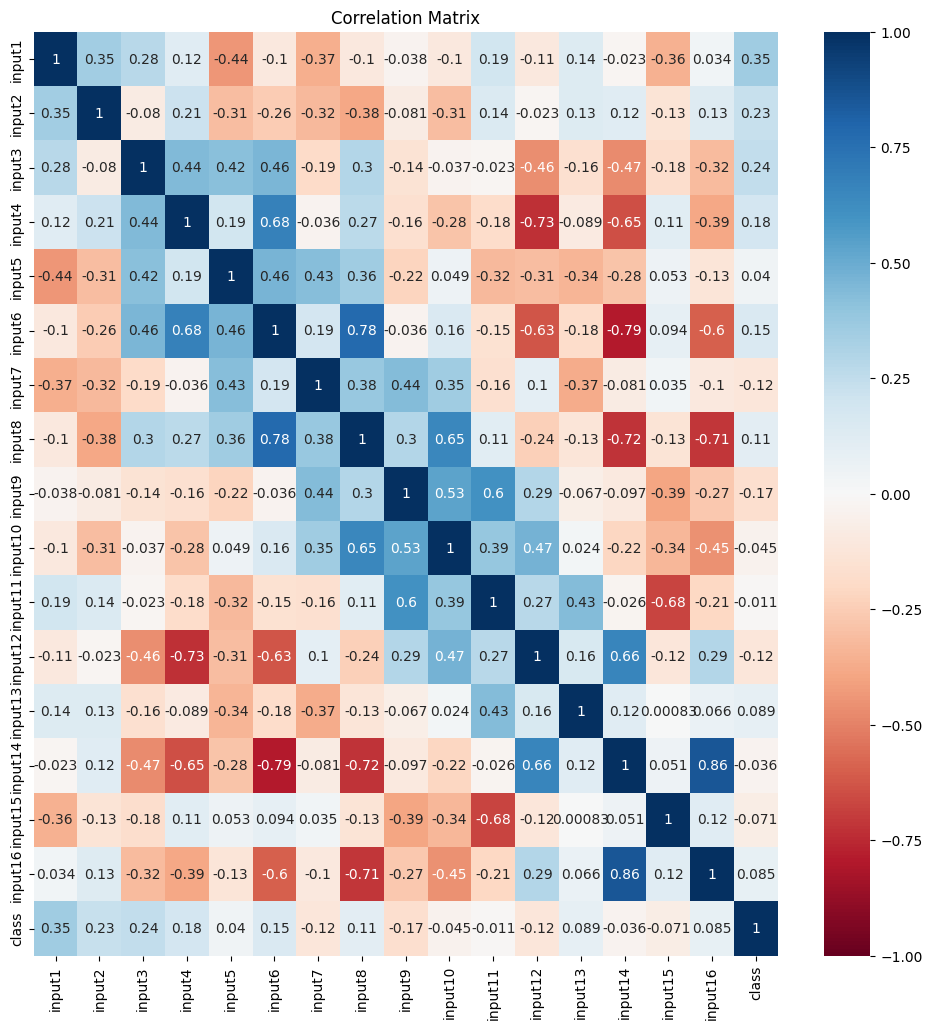

In [11]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot:>

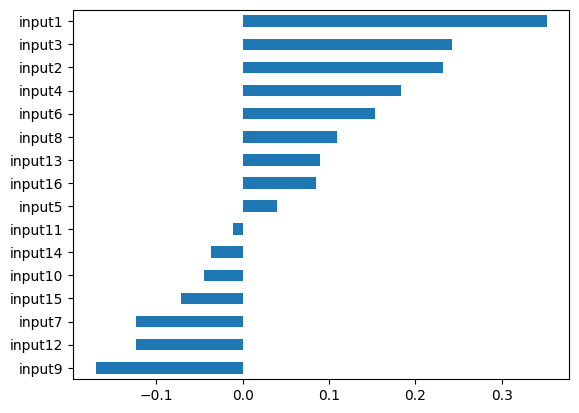

In [12]:
df.corr()["class"].drop("class").sort_values().plot.barh()

In [13]:
fig = px.scatter_3d(df, x='input1', y='input2', z='input3', color='class')
fig.show()

# Random Forest Classifier

In [14]:
X = df.drop('class',axis=1)
y = df['class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=33)

## Modelling and Model Performance

In [16]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [18]:
dt_model = DecisionTreeClassifier(random_state=33)
dt_model.fit(X_train, y_train)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[226   1   0   0   0   0   1   0   1   0]
 [  0 216   5   1   1   0   0   2   2   2]
 [  0   6 218   0   0   0   3   1   1   0]
 [  0   2   1 204   0   2   0   1   0   1]
 [  0   1   1   0 223   0   1   0   0   3]
 [  0   1   0   4   0 195   0   2   2   7]
 [  3   0   0   0   2   0 205   1   0   0]
 [  0   2   1   1   0   1   0 221   2   0]
 [  3   0   0   1   0   1   2   3 201   0]
 [  0   2   0   0   1   6   1   0   0 201]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       229
           1       0.94      0.94      0.94       229
           2       0.96      0.95      0.96       229
           3       0.97      0.97      0.97       211
           4       0.98      0.97      0.98       229
           5       0.95      0.92      0.94       211
           6       0.96      0.97      0.97       211
           7       0.96      0.97      0.96       228
           8       0.96      0.95      0.96       211
           9       

### Cross Validate

In [19]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [20]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.955647
test_precision_micro    0.955647
test_recall_micro       0.955647
test_f1_micro           0.955647
dtype: float64

### DT Model Feature Importance

In [21]:
dt_feature_imp = pd.DataFrame(index = X.columns, data = dt_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
dt_feature_imp

Feature Importance
input14            0.128540
input10            0.113205
input11            0.096307
input16            0.095082
input5             0.088113
input15            0.084809
input9             0.084201
input1             0.068909
input4             0.060861
input2             0.058978
input13            0.037633
input3             0.026406
input7             0.024448
input8             0.015319
input12            0.009561
input6             0.007626

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf_model = RandomForestClassifier(random_state=33)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[226   0   0   0   0   0   0   0   3   0]
 [  0 222   4   1   1   0   0   1   0   0]
 [  0   1 228   0   0   0   0   0   0   0]
 [  0   0   1 209   0   0   0   0   0   1]
 [  0   0   0   0 226   0   0   1   0   2]
 [  0   0   0   1   0 207   0   0   1   2]
 [  0   0   0   0   0   0 211   0   0   0]
 [  0   1   0   0   0   0   0 227   0   0]
 [  0   0   0   0   0   0   0   0 211   0]
 [  0   0   0   0   0   0   0   0   0 211]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       229
           1       0.99      0.97      0.98       229
           2       0.98      1.00      0.99       229
           3       0.99      0.99      0.99       211
           4       1.00      0.99      0.99       229
           5       1.00      0.98      0.99       211
           6       1.00      1.00      1.00       211
           7       0.99      1.00      0.99       228
           8       0.98      1.00      0.99       211
           9       

## Cross Validate

In [24]:
model = RandomForestClassifier(class_weight = "balanced", random_state=33)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy           0.99113
test_precision_micro    0.99113
test_recall_micro       0.99113
test_f1_micro           0.99113
dtype: float64

## Grid Search

In [29]:
param_grid = {'n_estimators':[300, 500, 800],  
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[19, 21, 23, 25],
             'min_samples_split':[2, 5]}

In [30]:
model = RandomForestClassifier(class_weight = "balanced", random_state=33)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [31]:
rf_grid_model.best_params_

{'max_depth': 21,
 'max_features': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [32]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[225   0   0   0   1   0   0   0   3   0]
 [  0 223   4   0   1   0   0   1   0   0]
 [  0   1 228   0   0   0   0   0   0   0]
 [  0   0   1 209   0   0   0   0   0   1]
 [  0   0   0   0 226   0   0   1   0   2]
 [  0   0   0   2   0 206   0   0   1   2]
 [  0   0   0   0   0   0 211   0   0   0]
 [  0   2   0   0   0   0   0 226   0   0]
 [  0   0   0   0   0   0   0   0 211   0]
 [  1   0   0   0   0   0   0   0   0 210]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       229
           1       0.99      0.97      0.98       229
           2       0.98      1.00      0.99       229
           3       0.99      0.99      0.99       211
           4       0.99      0.99      0.99       229
           5       1.00      0.98      0.99       211
           6       1.00      1.00      1.00       211
           7       0.99      0.99      0.99       228
           8       0.98      1.00      0.99       211
           9       

# Support Vector Machine (SVM) Classifier

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [39]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=33))]
pipe_model = Pipeline(steps=operations)

In [40]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[228   0   0   0   0   0   0   0   1   0]
 [  0 223   3   0   1   0   0   2   0   0]
 [  0   1 228   0   0   0   0   0   0   0]
 [  0   0   1 209   0   0   0   0   0   1]
 [  0   0   0   0 228   0   0   1   0   0]
 [  0   0   0   1   0 209   0   0   1   0]
 [  0   0   0   0   0   0 211   0   0   0]
 [  0   0   0   0   0   0   0 228   0   0]
 [  0   0   0   0   0   0   0   0 211   0]
 [  0   1   0   0   0   1   0   0   0 209]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.99      0.97      0.98       229
           2       0.98      1.00      0.99       229
           3       1.00      0.99      0.99       211
           4       1.00      1.00      1.00       229
           5       1.00      0.99      0.99       211
           6       1.00      1.00      1.00       211
           7       0.99      1.00      0.99       228
           8       0.99      1.00      1.00       211
           9       

In [42]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.994542
test_precision_micro    0.994542
test_recall_micro       0.994542
test_f1_micro           0.994542
dtype: float64

## With Best Parameters (GridsearchCV)

In [43]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear']}

In [44]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, class_weight="balanced", random_state=42))]
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model, param_grid, scoring="accuracy", cv=10)

In [45]:
svm_model_grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             scoring='accuracy')>

In [46]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [47]:
svm_model_grid.best_params_

{'SVC__C': 0.1, 'SVC__gamma': 0.2, 'SVC__kernel': 'rbf'}

In [48]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[224   0   0   0   0   0   0   0   5   0]
 [  0 220   5   1   1   0   0   2   0   0]
 [  0   1 228   0   0   0   0   0   0   0]
 [  0   0   1 209   0   0   0   0   0   1]
 [  0   0   0   0 226   1   0   2   0   0]
 [  0   0   0   3   0 204   0   0   4   0]
 [  0   0   0   0   0   0 211   0   0   0]
 [  0   0   0   0   0   0   0 228   0   0]
 [  0   0   0   0   0   0   0   0 211   0]
 [  0   1   0   0   0   0   0   0   0 210]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       229
           1       0.99      0.96      0.98       229
           2       0.97      1.00      0.98       229
           3       0.98      0.99      0.99       211
           4       1.00      0.99      0.99       229
           5       1.00      0.97      0.98       211
           6       1.00      1.00      1.00       211
           7       0.98      1.00      0.99       228
           8       0.96      1.00      0.98       211
           9       

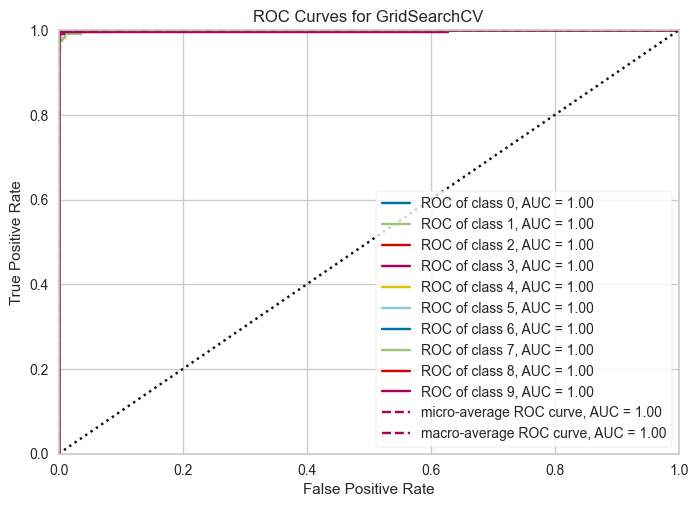

In [53]:
from yellowbrick.classifier import ROCAUC
model = svm_model_grid
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

# Conclusion

## Random Forest

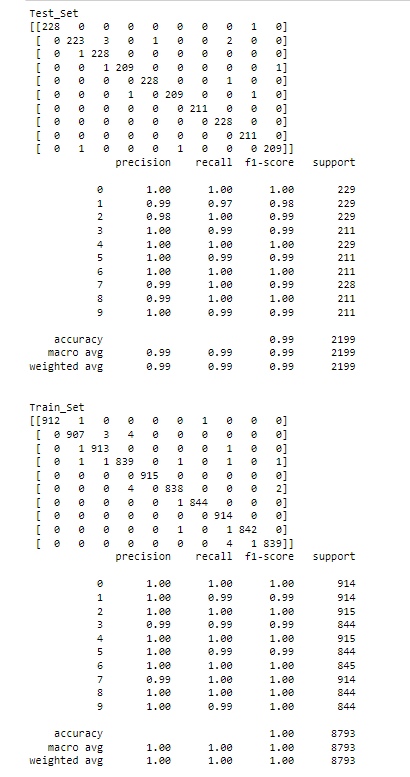

## Svm

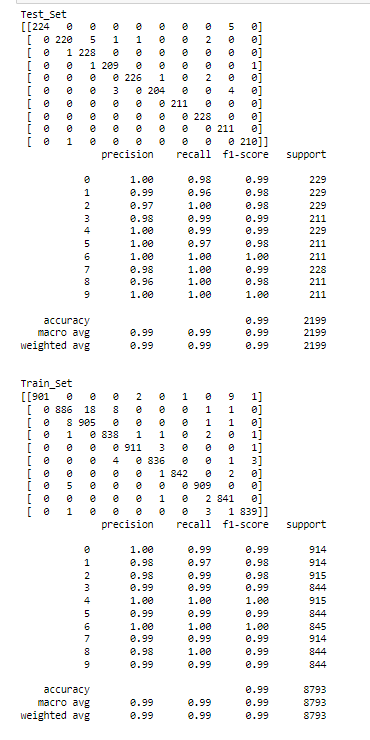

### İki modelimizde de birbirine neredeyse aynı ve yüksek skorlu sonuçlar elde ettik. İş yükü ve model kompleksliği açısından Random Forest tercih edilebilir.